/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


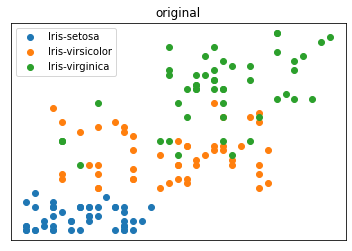

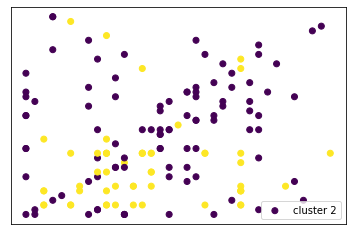

n_cluster가 2 일 때 ARI 값 = 0.5312290473980091



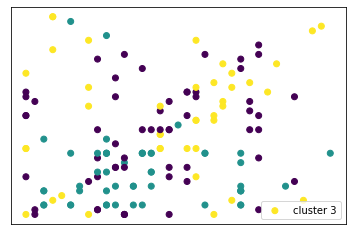

n_cluster가 3 일 때 ARI 값 = 0.6988627672348092



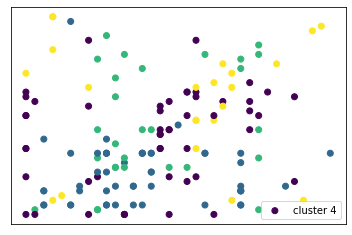

n_cluster가 4 일 때 ARI 값 = 0.5950902806203666



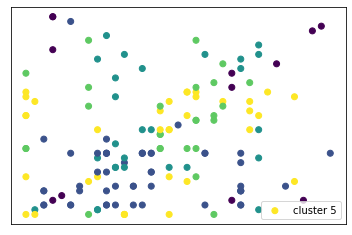

n_cluster가 5 일 때 ARI 값 = 0.5973133285267539



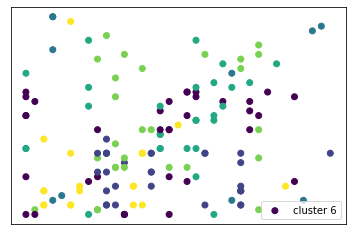

n_cluster가 6 일 때 ARI 값 = 0.44716134606765456

가장 좋은 성능을 가진 cluster 과 ARI
n_cluster =  3 
best ARI =  0.6988627672348092


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler   #정규화
from sklearn.cluster import KMeans  #kmeans 사이킷런
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder  #정수 인코딩
import seaborn as sns
####################################################################################
##########                  정수 인코딩                  
####################################################################################
df = pd.read_csv('lab8_test.csv', names=['sepal length', 
                                         'sepal width', 
                                         'petal length', 
                                         'petal width', 
                                         'label'])

feature = pd.DataFrame(['sepal length', 
                        'sepal width', 
                        'petal length', 
                        'petal width'])

data = df[['sepal length', 'sepal width', 'petal length', 'petal width']]

data.columns = feature[0]

target = pd.DataFrame(df[['label']])
encoder = LabelEncoder()   #정수 인코딩
target = encoder.fit_transform(target)
target = pd.DataFrame(target)
target.columns=['target']

df = pd.concat([data, target], axis = 1)   #둘을 합친다

df = df.astype({'target': 'object'}) 

#print('before df is ', df)

####################################################################################
#######                  clusters
####################################################################################

df_f = df[1:].copy()

virginica = df_f[df_f['target'] == 2]  #Iris-virginica
versicolor = df_f[df_f['target'] == 1]  #Iris-versicolor
setosa = df_f[df_f['target'] == 0]  #Iris-setosa


plt.title('original')
plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 2], label='Iris-setosa')
plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 2], label='Iris-virsicolor')
plt.scatter(virginica.iloc[:, 0], virginica.iloc[:, 2], label='Iris-virginica')
plt.gca().axes.xaxis.set_visible(False) #x축만 없애기
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.legend()
#plt.subplot(2, 3, 1)
plt.show()

# 결과값 저장할 변수
best_cluster = 2
best_ARI = 0

features = df_f.iloc[:, :-1]
labels = pd.DataFrame(df_f.iloc[:, -1])

#df_temp = df_f[['sepal length', 'petal length']]   #1, 3 번째 축을 x, y로 설정 

for i in range(2, 7):
    
    model = KMeans(n_clusters = i, random_state = 0)
    model.fit(df_temp)
    y_kmeans = model.predict(df_temp)

    plt.gca().axes.xaxis.set_visible(False) #x축만 없애기
    plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
    plt.scatter(df_f['sepal length'], df_f['petal length'], 
                c=y_kmeans, label = 'cluster ' + str(i))
    plt.legend()
    plt.show()
    predict = labels.transpose().values[0]
    current_ARI = adjusted_rand_score(predict, model.labels_)
    
    if best_ARI < current_ARI:
        best_cluster = i
        best_ARI = current_ARI
        
    print("n_cluster가", i, "일 때 ARI 값 =", current_ARI)
    print()


print("가장 좋은 성능을 가진 cluster 과 ARI")
print("n_cluster = ", best_cluster, "\nbest ARI = ", best_ARI)
